# Solutions - Practical Lesson 8 

## Exercises

### Exercise 8.3
Taking as example the pricing NN trained on call, try to price put options.

#### Solution
To adapt the code to predict put prices instead of calls it is enough to replace in the `bs_simulation.py` the function call to the call pricer (much easier to do than to explain):

In [ ]:
import numpy as np                                                                                                                                  
np.random.seed(1000)                                                                                                                                
import matplotlib.pyplot as plt                                                                                                                     
import csv                                                                                                                                          
from finmarkets import put                                                                                                                          
                                                                                                                                                    
def gen_paths(S0, r, sigmas, T, M, I):                                                                                                              
    dt = float(T) / M                                                                                                                               
    paths = np.zeros((M + 1, I), np.float64)                                                                                                        
    paths[0] = S0                                                                                                                                   
    for t in range(1, M + 1):                                                                                                                       
        for i in range(len(sigmas)):                                                                                                                
            rand = np.random.standard_normal()                                                                                                      
            paths[t, i] = paths[t - 1, i] * np.exp((r - 0.5 * sigmas[i] ** 2) * dt +                                                                
                                             sigmas[i] * np.sqrt(dt) * rand)                                                                        
    return paths                                                                                                                                    
                                                                                                                                                    
S0 = 100                                    # initial stock price                                                                                   
K = [100]#[80, 90, 100, 110, 120]           # strike price                                                                                          
r = 0.01                                    # risk-free interest rate                                                                               
sigmas = [s/100. for s in range(15, 55, 5) ]# volatility in market                                                                                  
T = [1] #0.25, 0.5, 0.75, 1, 2, 3]          # time in years                                                                                         
M = 365*max(T)                              # number of steps within each simulation                                                                
I = len(sigmas)                             # number of simulations                                                                                 
                                                                                                                                                    
                                                                                                                                                    
paths = gen_paths(S0, r, sigmas, max(T), M, I)                                                                                                      
                                                                                                                                                    
plt.ion()                                                                                                                                           
plt.plot(paths)                                                                                                                                     
plt.grid(True)                                                                                                                                      
plt.xlabel('days')                                                                                                                                  
plt.ylabel('$S^{i}_{t}$')                                                                                                                           
plt.show()                                                                                                                                          
plt.savefig("underlyings.png")                    

with open("bs_training.csv", mode='w') as f:                                                                                                        
    writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)                                                                 
    for sims in range(I):                                                                                                                           
        for i, S_t in enumerate(paths[:, sims]):                                                                                                    
            for t in T:                                                                                                                             
                M = t * 365                                                                                                                         
                if i >= M:                                                                                                                          
                    continue                                                                                                                        
                for k in K:                                                                                                                         
                    put_price = put(S_t, k, r, sigmas[sims], t)                                                                                     
                    writer.writerow([sigmas[sims], k, t, S_t, put_price])                                                                           
                                                                                                                                                    
                                                                                                                                                    
S0 = 100                                                                                                                                            
K = 100                                                                                                                                             
r = 0.01                                                                                                                                            
sigmas = [0.25]                                                                                                                                     
T = 1                                                                                                                                               
M = 365*T                                                                                                                                           
I = 1                                                                                                                                               
                                                                                                                                                    
paths = gen_paths(S0, r, sigmas, T, M, I)
with open("bs_testing.csv", mode='w') as f:                                                                                                         
    writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)                                                                 
    for i, S_t in enumerate(paths[:, 0]):                                                                                                           
        put_price = put(S_t, K,  r, sigmas[0], T)                                                                                                   
        writer.writerow([sigmas[0], K, T, S_t, put_price])                                                                                          
                                                                                                                                                    
                                                                                                                                                    
S0 = 100                                                                                                                                            
K = 95                                                                                                                                              
r = 0.01                                                                                                                                            
sigmas = [0.20]                                                                                                                                     
T = 3                                                                                                                                               
M = 365*T                                                                                                                                           
I = 1                                                                                                                                               
                                                                                                                                                    
paths = gen_paths(S0, r, sigmas, T, M, I)                                                                                                           
                                                                                                                                                    
with open("bs_testing_off.csv", mode='w') as f:                                                                                                     
    writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)                                                                 
    for i, S_t in enumerate(paths[:, 0]):                                                                                                           
        put_price = put(S_t, K,  r, sigmas[0], T)                                                                                                   
        writer.writerow([sigmas[0], K, T, S_t, put_price])            

Then it is enough to run on the generated samples, `bs_training.py` and `bs_testing.py` to train and check the performance of the new NN.

In [1]:
import bs_training

Using TensorFlow backend.
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sani/.python3/lib/python3.7/site-packages/tensorflow/python


Epoch 1/1000
2919/2919 [==============================] - 0s 55us/step - loss: 376.4286 - mse: 376.4286 - mae: 15.1232
Epoch 2/1000
2919/2919 [==============================] - 0s 19us/step - loss: 301.6522 - mse: 301.6523 - mae: 12.3479
Epoch 3/1000
2919/2919 [==============================] - 0s 17us/step - loss: 211.1528 - mse: 211.1528 - mae: 9.9257
Epoch 4/1000
2919/2919 [==============================] - 0s 13us/step - loss: 182.3894 - mse: 182.3894 - mae: 9.5843
Epoch 5/1000
2919/2919 [==============================] - 0s 11us/step - loss: 178.2265 - mse: 178.2264 - mae: 9.5143
Epoch 6/1000
2919/2919 [==============================] - 0s 14us/step - loss: 173.5210 - mse: 173.5210 - mae: 9.3813
Epoch 7/1000
2919/2919 [==============================] - 0s 14us/step - loss: 168.0572 - mse: 168.0573 - mae: 9.1957
Epoch 8/1000
2919/2919 [==============================] - 0s 14us/step - loss: 161.7442 - mse: 161.7442 - mae: 9.0734
Epoch 9/1000
2919/2919 [=============================

2919/2919 [==============================] - 0s 10us/step - loss: 12.1525 - mse: 12.1525 - mae: 2.8689
Epoch 69/1000
2919/2919 [==============================] - 0s 11us/step - loss: 12.0761 - mse: 12.0761 - mae: 2.8596
Epoch 70/1000
2919/2919 [==============================] - 0s 10us/step - loss: 12.0450 - mse: 12.0450 - mae: 2.8572
Epoch 71/1000
2919/2919 [==============================] - 0s 9us/step - loss: 11.9940 - mse: 11.9940 - mae: 2.8533
Epoch 72/1000
2919/2919 [==============================] - 0s 10us/step - loss: 11.9650 - mse: 11.9650 - mae: 2.8452
Epoch 73/1000
2919/2919 [==============================] - 0s 10us/step - loss: 11.9527 - mse: 11.9527 - mae: 2.8343
Epoch 74/1000
2919/2919 [==============================] - 0s 12us/step - loss: 12.0205 - mse: 12.0205 - mae: 2.8516
Epoch 75/1000
2919/2919 [==============================] - 0s 14us/step - loss: 11.8281 - mse: 11.8281 - mae: 2.8184
Epoch 76/1000
2919/2919 [==============================] - 0s 11us/step - loss:

2919/2919 [==============================] - 0s 10us/step - loss: 8.9025 - mse: 8.9025 - mae: 2.4423
Epoch 138/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.7396 - mse: 8.7396 - mae: 2.4239
Epoch 139/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.6182 - mse: 8.6182 - mae: 2.4026
Epoch 140/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.5979 - mse: 8.5979 - mae: 2.4032
Epoch 141/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.5362 - mse: 8.5362 - mae: 2.3857
Epoch 142/1000
2919/2919 [==============================] - 0s 12us/step - loss: 8.5447 - mse: 8.5447 - mae: 2.4003
Epoch 143/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.5097 - mse: 8.5097 - mae: 2.3870
Epoch 144/1000
2919/2919 [==============================] - 0s 11us/step - loss: 8.3070 - mse: 8.3070 - mae: 2.3658
Epoch 145/1000
2919/2919 [==============================] - 0s 10us/step - loss: 8.1894

2919/2919 [==============================] - 0s 10us/step - loss: 2.2467 - mse: 2.2467 - mae: 1.2051
Epoch 208/1000
2919/2919 [==============================] - 0s 11us/step - loss: 2.2451 - mse: 2.2451 - mae: 1.2077
Epoch 209/1000
2919/2919 [==============================] - 0s 12us/step - loss: 2.1820 - mse: 2.1820 - mae: 1.1963
Epoch 210/1000
2919/2919 [==============================] - 0s 10us/step - loss: 2.1395 - mse: 2.1395 - mae: 1.1833
Epoch 211/1000
2919/2919 [==============================] - 0s 11us/step - loss: 2.0308 - mse: 2.0308 - mae: 1.1533
Epoch 212/1000
2919/2919 [==============================] - 0s 12us/step - loss: 1.8896 - mse: 1.8896 - mae: 1.1113
Epoch 213/1000
2919/2919 [==============================] - 0s 11us/step - loss: 1.8833 - mse: 1.8833 - mae: 1.1118
Epoch 214/1000
2919/2919 [==============================] - 0s 11us/step - loss: 1.7746 - mse: 1.7746 - mae: 1.0727
Epoch 215/1000
2919/2919 [==============================] - 0s 11us/step - loss: 1.7776

2919/2919 [==============================] - 0s 12us/step - loss: 0.2603 - mse: 0.2603 - mae: 0.4093
Epoch 278/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.2798 - mse: 0.2798 - mae: 0.4217
Epoch 279/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.2682 - mse: 0.2682 - mae: 0.4166
Epoch 280/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.2539 - mse: 0.2539 - mae: 0.4007
Epoch 281/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.2511 - mse: 0.2511 - mae: 0.4022
Epoch 282/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.2523 - mse: 0.2523 - mae: 0.4002
Epoch 283/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.2546 - mse: 0.2546 - mae: 0.4054
Epoch 284/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.2553 - mse: 0.2553 - mae: 0.4038
Epoch 285/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.2357

2919/2919 [==============================] - 0s 11us/step - loss: 0.1880 - mse: 0.1880 - mae: 0.3345
Epoch 348/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.2139 - mse: 0.2139 - mae: 0.3592
Epoch 349/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.2045 - mse: 0.2045 - mae: 0.3486
Epoch 350/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1961 - mse: 0.1961 - mae: 0.3427
Epoch 351/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1864 - mse: 0.1864 - mae: 0.3298
Epoch 352/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.2183 - mse: 0.2183 - mae: 0.3625
Epoch 353/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1848 - mse: 0.1848 - mae: 0.3299
Epoch 354/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1872 - mse: 0.1872 - mae: 0.3328
Epoch 355/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1873

2919/2919 [==============================] - 0s 10us/step - loss: 0.1661 - mse: 0.1661 - mae: 0.3084
Epoch 418/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1754 - mse: 0.1754 - mae: 0.3174
Epoch 419/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1714 - mse: 0.1714 - mae: 0.3143
Epoch 420/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1658 - mse: 0.1658 - mae: 0.3080
Epoch 421/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1652 - mse: 0.1652 - mae: 0.3066
Epoch 422/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1606 - mse: 0.1606 - mae: 0.3026
Epoch 423/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1640 - mse: 0.1640 - mae: 0.3051
Epoch 424/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1691 - mse: 0.1691 - mae: 0.3139
Epoch 425/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1658

2919/2919 [==============================] - 0s 13us/step - loss: 0.1515 - mse: 0.1515 - mae: 0.2910
Epoch 488/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1478 - mse: 0.1478 - mae: 0.2856
Epoch 489/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1387 - mse: 0.1387 - mae: 0.2751
Epoch 490/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1622 - mse: 0.1622 - mae: 0.3078
Epoch 491/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1397 - mse: 0.1397 - mae: 0.2745
Epoch 492/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1382 - mse: 0.1382 - mae: 0.2735
Epoch 493/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1364 - mse: 0.1364 - mae: 0.2747
Epoch 494/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1392 - mse: 0.1392 - mae: 0.2735
Epoch 495/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.1366

2919/2919 [==============================] - 0s 14us/step - loss: 0.1234 - mse: 0.1234 - mae: 0.2579
Epoch 558/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1232 - mse: 0.1232 - mae: 0.2558
Epoch 559/1000
2919/2919 [==============================] - 0s 17us/step - loss: 0.1264 - mse: 0.1264 - mae: 0.2587
Epoch 560/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1290 - mse: 0.1290 - mae: 0.2650
Epoch 561/1000
2919/2919 [==============================] - 0s 15us/step - loss: 0.1298 - mse: 0.1298 - mae: 0.2645
Epoch 562/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1324 - mse: 0.1324 - mae: 0.2709
Epoch 563/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1247 - mse: 0.1247 - mae: 0.2595
Epoch 564/1000
2919/2919 [==============================] - 0s 17us/step - loss: 0.1194 - mse: 0.1194 - mae: 0.2511
Epoch 565/1000
2919/2919 [==============================] - 0s 15us/step - loss: 0.1244

2919/2919 [==============================] - 0s 10us/step - loss: 0.1114 - mse: 0.1114 - mae: 0.2434
Epoch 628/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.1110 - mse: 0.1110 - mae: 0.2427
Epoch 629/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1090 - mse: 0.1090 - mae: 0.2376
Epoch 630/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1026 - mse: 0.1026 - mae: 0.2297
Epoch 631/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1068 - mse: 0.1068 - mae: 0.2363
Epoch 632/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1120 - mse: 0.1120 - mae: 0.2423
Epoch 633/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.1055 - mse: 0.1055 - mae: 0.2367
Epoch 634/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1046 - mse: 0.1046 - mae: 0.2308
Epoch 635/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.1062

2919/2919 [==============================] - 0s 13us/step - loss: 0.0972 - mse: 0.0972 - mae: 0.2258
Epoch 698/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0919 - mse: 0.0919 - mae: 0.2128
Epoch 699/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.0921 - mse: 0.0921 - mae: 0.2166
Epoch 700/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.0912 - mse: 0.0912 - mae: 0.2152
Epoch 701/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0907 - mse: 0.0907 - mae: 0.2117
Epoch 702/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0891 - mse: 0.0891 - mae: 0.2114
Epoch 703/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0957 - mse: 0.0957 - mae: 0.2215
Epoch 704/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0969 - mse: 0.0969 - mae: 0.2266
Epoch 705/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0904

2919/2919 [==============================] - 0s 14us/step - loss: 0.0840 - mse: 0.0840 - mae: 0.2087
Epoch 768/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.0814 - mse: 0.0814 - mae: 0.2009
Epoch 769/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0832 - mse: 0.0832 - mae: 0.2063
Epoch 770/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0766 - mse: 0.0766 - mae: 0.1896
Epoch 771/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0823 - mse: 0.0823 - mae: 0.2030
Epoch 772/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0800 - mse: 0.0800 - mae: 0.2001
Epoch 773/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.1060 - mse: 0.1060 - mae: 0.2450
Epoch 774/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0785 - mse: 0.0785 - mae: 0.1982
Epoch 775/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0803

2919/2919 [==============================] - 0s 16us/step - loss: 0.0741 - mse: 0.0741 - mae: 0.1945
Epoch 838/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0694 - mse: 0.0694 - mae: 0.1844
Epoch 839/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.0703 - mse: 0.0703 - mae: 0.1852
Epoch 840/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0689 - mse: 0.0689 - mae: 0.1837
Epoch 841/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0735 - mse: 0.0735 - mae: 0.1941
Epoch 842/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0731 - mse: 0.0731 - mae: 0.1927
Epoch 843/1000
2919/2919 [==============================] - 0s 14us/step - loss: 0.0671 - mse: 0.0671 - mae: 0.1796
Epoch 844/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0681 - mse: 0.0681 - mae: 0.1789
Epoch 845/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0675

2919/2919 [==============================] - 0s 12us/step - loss: 0.0639 - mse: 0.0639 - mae: 0.1792
Epoch 908/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0594 - mse: 0.0594 - mae: 0.1684
Epoch 909/1000
2919/2919 [==============================] - 0s 15us/step - loss: 0.0619 - mse: 0.0619 - mae: 0.1727
Epoch 910/1000
2919/2919 [==============================] - 0s 13us/step - loss: 0.0615 - mse: 0.0615 - mae: 0.1744
Epoch 911/1000
2919/2919 [==============================] - 0s 9us/step - loss: 0.0637 - mse: 0.0637 - mae: 0.1789
Epoch 912/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0606 - mse: 0.0606 - mae: 0.1717
Epoch 913/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0613 - mse: 0.0613 - mae: 0.1739
Epoch 914/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0728 - mse: 0.0728 - mae: 0.1983
Epoch 915/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0600 

2919/2919 [==============================] - 0s 12us/step - loss: 0.0552 - mse: 0.0552 - mae: 0.1667
Epoch 978/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0549 - mse: 0.0549 - mae: 0.1630
Epoch 979/1000
2919/2919 [==============================] - 0s 9us/step - loss: 0.0591 - mse: 0.0591 - mae: 0.1738
Epoch 980/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0546 - mse: 0.0546 - mae: 0.1638
Epoch 981/1000
2919/2919 [==============================] - 0s 9us/step - loss: 0.0526 - mse: 0.0526 - mae: 0.1575
Epoch 982/1000
2919/2919 [==============================] - 0s 10us/step - loss: 0.0583 - mse: 0.0583 - mae: 0.1750
Epoch 983/1000
2919/2919 [==============================] - 0s 9us/step - loss: 0.0516 - mse: 0.0516 - mae: 0.1559
Epoch 984/1000
2919/2919 [==============================] - 0s 12us/step - loss: 0.0648 - mse: 0.0648 - mae: 0.1901
Epoch 985/1000
2919/2919 [==============================] - 0s 11us/step - loss: 0.0545 - 

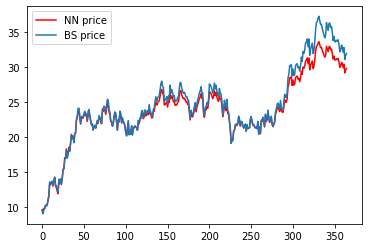

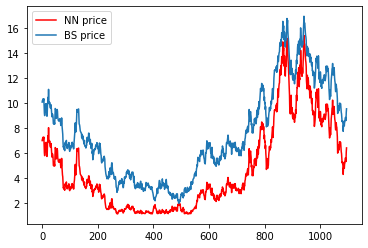

<Figure size 432x288 with 0 Axes>

In [2]:
import bs_testing

From this simple exercise with some degree of symmetry between the two problems it is clear that it is not enough to reuse some NN without specific study on the problem under investigation.